In [1]:
import pandas as pd
import numpy as np
import os

# pandasai imports
from pandasai.llm.openai import OpenAI
from pandasai import PandasAI
from pandasai import SmartDataframe

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from dotenv import load_dotenv

In [2]:
# finds .env file and loads the vars
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY", "Key not found")

# Load data
Here we assume that we have created the data pkl objects in prior processing (`blog_eda_2.ipynb`)

In [3]:
mirai_df = pd.read_pickle("../data/blog_eda/mirai.pkl")
benign_df = pd.read_pickle("../data/blog_eda/benign.pkl")

In [4]:
mirai_flow_df_numeric = pd.read_pickle("../data/blog_eda/mirai_flow_numeric.pkl")
benign_flow_df_numeric = pd.read_pickle("../data/blog_eda/benign_flow_numeric.pkl")

# EDA with Pandas AI

In [5]:
# Instantiate a LLM
llm = OpenAI(api_token=openai_api_key)
pandas_ai = PandasAI(llm)

In [6]:
mirai_smart = SmartDataframe(
    df=pd.DataFrame(mirai_flow_df_numeric), config={"llm": llm}
)
mirai_clean_df = mirai_smart.clean_data()

In [7]:
benign_smart = SmartDataframe(
    df=pd.DataFrame(benign_flow_df_numeric), config={"llm": llm}
)
benign_clean_df = benign_smart.clean_data()

In [8]:
mirai_clean_df

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric
0,68.0,67.0,17.0,27,4482,6131.120998,0,4294967295
1,23.0,21897.0,6.0,1432,37232,2375.572448,3232236033,3232236142
2,23.0,46734.0,6.0,30,780,47.907811,3232236033,3232236142
3,23.0,50364.0,6.0,75,1950,122.722774,3232236033,3232236142
4,23.0,52777.0,6.0,20,520,31.410413,3232236033,3232236142
...,...,...,...,...,...,...,...,...
36580,52413.0,123.0,17.0,1,56,0.000000,3232236228,3349498891
36581,33119.0,123.0,17.0,1,56,0.000000,3232236228,3632630861
36582,42414.0,123.0,17.0,1,56,0.000000,3232236228,3632630861
36583,49134.0,123.0,17.0,1,56,0.000000,3232236228,1123232514


In [9]:
benign_clean_df

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric
0,68.0,67.0,17.0,9,2945,1.766763e+08,0,4294967295
1,53.0,61696.0,17.0,1,88,0.000000e+00,16843009,2886738307
2,53.0,33538.0,17.0,1,92,0.000000e+00,16843009,3232236373
3,53.0,34035.0,17.0,1,111,0.000000e+00,16843009,3232236373
4,53.0,39653.0,17.0,1,110,0.000000e+00,16843009,3232236373
...,...,...,...,...,...,...,...,...
1684,500.0,500.0,17.0,13,3528,4.310492e+02,1574750820,1352297700
1685,123.0,123.0,17.0,17,952,5.198236e+02,1585590714,3232246283
1686,500.0,500.0,17.0,18,4738,4.338344e+02,1601469645,1352297700
1687,53.0,26323.0,17.0,1,123,0.000000e+00,1632267530,3232237365


In [10]:
top_5_source_IPs = pandas_ai(
    mirai_clean_df, prompt="Which are the 5 most popular source IP addresses?"
)
top_5_source_IPs

,Source IP Numeric,Count
9,3232236142,6361
11,3232236144,6247
8,3232236141,5483
13,3232236147,3752
12,3232236145,3667


In [11]:
top_5_dst_ports = pandas_ai(
    mirai_clean_df, prompt="Which are the 5 most popular destination ports?"
)
top_5_dst_ports

,Destination Port,Count
1,53.0,19427
4,80.0,6919
8,443.0,1678
3361,8280.0,1547
3357,8000.0,1385


Traceback (most recent call last):
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/smart_datalake/__init__.py", line 314, in chat
    result = self._code_manager.execute_code(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 199, in execute_code
    return analyze_data(self._get_original_dfs())
  File "<string>", line 7, in analyze_data
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", 

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/temp_chart.png'\n"

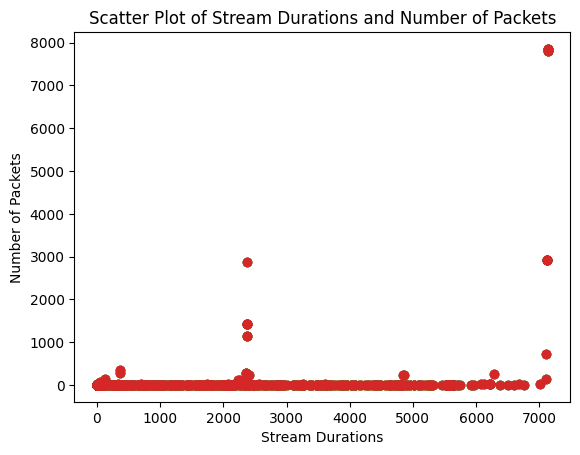

In [12]:
pandas_ai.run(
    mirai_clean_df,
    prompt="Plot the scatter plot of stream durations and number of packets.",
)

Traceback (most recent call last):
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/smart_datalake/__init__.py", line 314, in chat
    result = self._code_manager.execute_code(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 199, in execute_code
    return analyze_data(self._get_original_dfs())
  File "<string>", line 9, in analyze_data
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", 

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/temp_chart.png'\n"

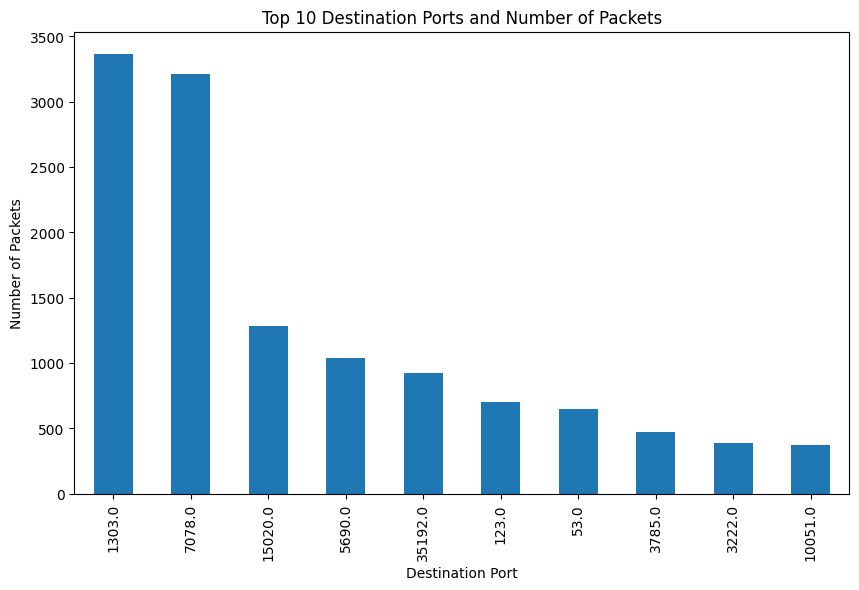

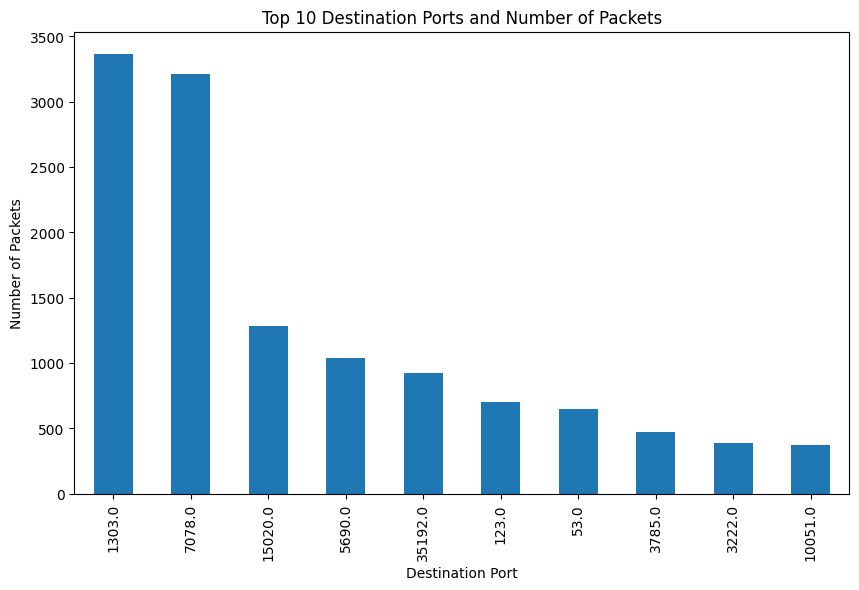

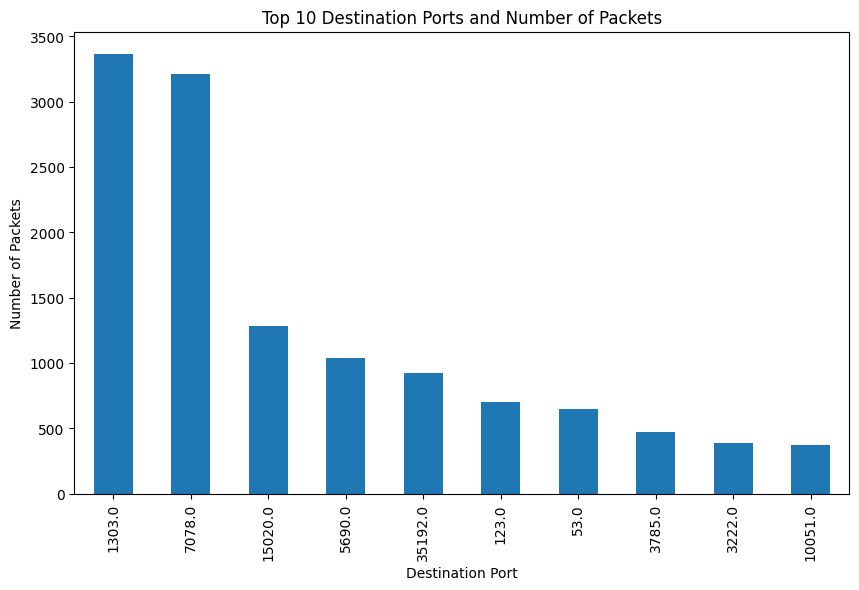

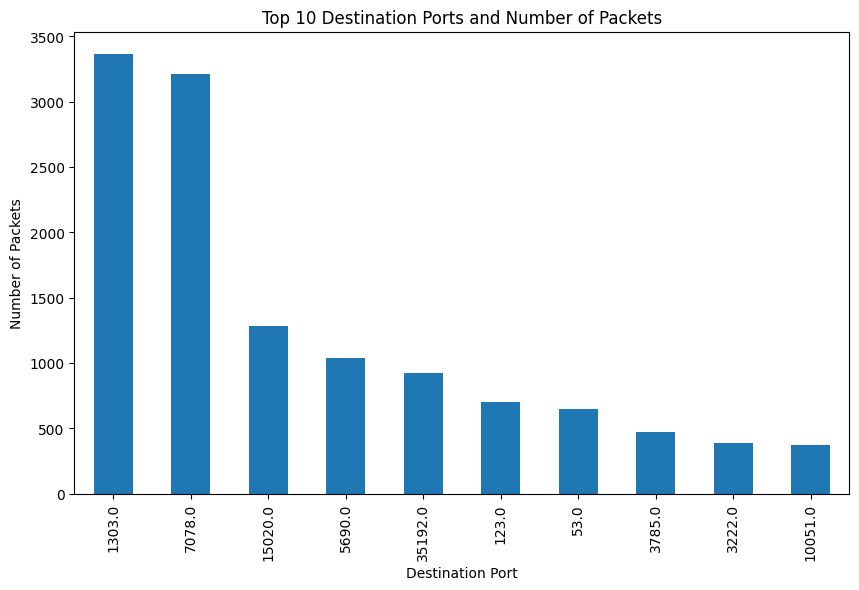

In [13]:
pandas_ai.run(
    benign_clean_df,
    prompt="Plot a barplot of top 10 destination ports and number of packets.",
)

# Feature Engineering with Pandas AI

In [14]:
mirai_clean_df.generate_features()

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric,Packet Length Ratio,Duration per Packet
0,68.0,67.0,17.0,27,4482,6131.120998,0,4294967295,166.0,227.078555
1,23.0,21897.0,6.0,1432,37232,2375.572448,3232236033,3232236142,26.0,1.658919
2,23.0,46734.0,6.0,30,780,47.907811,3232236033,3232236142,26.0,1.596927
3,23.0,50364.0,6.0,75,1950,122.722774,3232236033,3232236142,26.0,1.636304
4,23.0,52777.0,6.0,20,520,31.410413,3232236033,3232236142,26.0,1.570521
...,...,...,...,...,...,...,...,...,...,...
36580,52413.0,123.0,17.0,1,56,0.000000,3232236228,3349498891,56.0,0.000000
36581,33119.0,123.0,17.0,1,56,0.000000,3232236228,3632630861,56.0,0.000000
36582,42414.0,123.0,17.0,1,56,0.000000,3232236228,3632630861,56.0,0.000000
36583,49134.0,123.0,17.0,1,56,0.000000,3232236228,1123232514,56.0,0.000000


In [15]:
benign_clean_df.generate_features()

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric,Packet Length Ratio,Duration per Packet
0,68.0,67.0,17.0,9,2945,1.766763e+08,0,4294967295,327.222222,1.963070e+07
1,53.0,61696.0,17.0,1,88,0.000000e+00,16843009,2886738307,88.000000,0.000000e+00
2,53.0,33538.0,17.0,1,92,0.000000e+00,16843009,3232236373,92.000000,0.000000e+00
3,53.0,34035.0,17.0,1,111,0.000000e+00,16843009,3232236373,111.000000,0.000000e+00
4,53.0,39653.0,17.0,1,110,0.000000e+00,16843009,3232236373,110.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
1684,500.0,500.0,17.0,13,3528,4.310492e+02,1574750820,1352297700,271.384615,3.315763e+01
1685,123.0,123.0,17.0,17,952,5.198236e+02,1585590714,3232246283,56.000000,3.057786e+01
1686,500.0,500.0,17.0,18,4738,4.338344e+02,1601469645,1352297700,263.222222,2.410191e+01
1687,53.0,26323.0,17.0,1,123,0.000000e+00,1632267530,3232237365,123.000000,0.000000e+00
